<a href="https://colab.research.google.com/github/RizkyaSalsabila/Assignment-Sem5_ML_Rizkya-Salsabila/blob/main/praktikum_06/TG6_2341720056_Rizkya_Salsabila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM 1

### Langkah 1 - Instalasi Annoy

In [ ]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551808 sha256=5b6b7a06a15fe335bb73722c6a22f50039a8d8b083270a89b81c881fe409ee29
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


### Langkah 2 - Perbandingan Exact NN dan Approximate NN Menggunakan Annoy

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 10.1814 ms

Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.175 ms


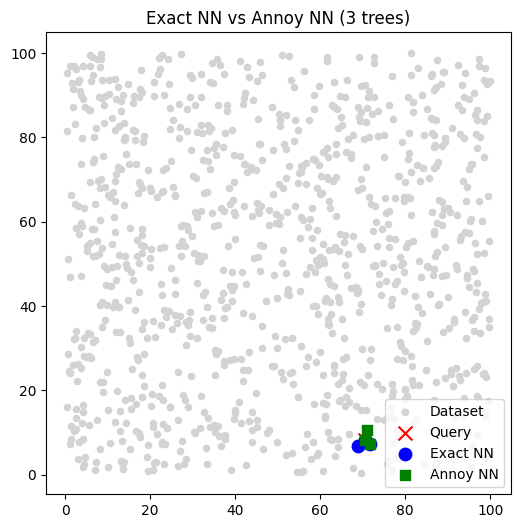

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Hasil Uji Coba

In [ ]:
import numpy as np
import time
from annoy import AnnoyIndex
from tabulate import tabulate  # untuk tampilan tabel yang rapi

# ===============================================
# KONFIGURASI EKSPERIMEN
# ===============================================
distance_metrics = ['euclidean', 'angular']
tree_counts = [3, 8]
data_sizes = [1000, 100000]
n_neighbors = 3  # jumlah tetangga terdekat yang dicari
np.random.seed(42)

# ===============================================
# FUNGSI UNTUK MENGHITUNG NN
# ===============================================
def run_experiment(metric, n_tree, n_points):
    # Dataset acak 2D
    X = np.random.rand(n_points, 2) * 100
    query = X[np.random.randint(0, n_points)]

    # --- Exact Nearest Neighbor (Brute Force) ---
    start = time.time()
    distances = np.linalg.norm(X - query, axis=1)
    idx_exact = np.argsort(distances)[:n_neighbors]
    time_exact = (time.time() - start) * 1000  # ms

    # --- Annoy Nearest Neighbor ---
    f = 2  # dimensi
    t = AnnoyIndex(f, metric)
    for i, vec in enumerate(X):
        t.add_item(i, vec)
    t.build(n_tree)

    start = time.time()
    idx_ann = t.get_nns_by_vector(query, n_neighbors)
    time_ann = (time.time() - start) * 1000  # ms

    return {
        "Distance Metrics": metric.capitalize(),
        "Tree": n_tree,
        "Jumlah Data": n_points,
        "ENN Index": list(idx_exact),
        "ANN Index": list(idx_ann),
        "Waktu (ms)": f"{time_exact:.4f} , {time_ann:.4f}"
    }

# ===============================================
# JALANKAN EKSPERIMEN
# ===============================================
results = []

for metric in distance_metrics:
    for n_tree in tree_counts:
        for n_points in data_sizes:
            print(f"Running: {metric}, {n_tree} trees, {n_points} data...")
            result = run_experiment(metric, n_tree, n_points)
            results.append(result)

# ===============================================
# TAMPILKAN HASIL DALAM TABEL
# ===============================================
headers = ["Distance Metrics", "Tree", "Jumlah Data", "ENN Index", "ANN Index", "Waktu (ms)"]
table = [[r[h] for h in headers] for r in results]

print("\n===== HASIL EKSPERIMEN ENN vs ANN =====")
print(tabulate(table, headers=headers, tablefmt="grid"))


Running: euclidean, 3 trees, 1000 data...
Running: euclidean, 3 trees, 100000 data...
Running: euclidean, 8 trees, 1000 data...
Running: euclidean, 8 trees, 100000 data...
Running: angular, 3 trees, 1000 data...
Running: angular, 3 trees, 100000 data...
Running: angular, 8 trees, 1000 data...
Running: angular, 8 trees, 100000 data...

===== HASIL EKSPERIMEN ENN vs ANN =====
+--------------------+--------+---------------+-----------------------------------------------------+-----------------------+------------------+
| Distance Metrics   |   Tree |   Jumlah Data | ENN Index                                           | ANN Index             | Waktu (ms)       |
+====================+========+===============+=====================================================+=======================+==================+
| Euclidean          |      3 |          1000 | [np.int64(219), np.int64(898), np.int64(593)]       | [219, 898, 770]       | 0.2289 , 0.0327  |
+--------------------+--------+------------

### Langkah 3 - Simulasi Pencarian Lagu Mirip (Exact NN vs Approximate NN pada Dataset Spotify)

In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 1000_000   # 50 juta track, bagian ini saya ganti 1000_000. Karena untuk 50 juta data, membutuhkan waktu yang lama dan memakan RAM
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 3

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [598980 711724 684407 520191 960852]
Exact NN time: 0.172 seconds
Annoy result: [188495, 137288, 290093, 57654, 450687]
Annoy time: 0.0 seconds


Uji Coba — Euclidean

In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 1_000_000   # 1 juta track sesuai tabel
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 8  # sesuai tabel

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [118985 778939 978643 306424 368366]
Exact NN time: 0.15 seconds
Annoy result: [883858, 876543, 370864, 925366, 191302]
Annoy time: 0.0 seconds


Uji Coba — Angular

In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 1_000_000   # 1 juta track sesuai tabel
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'angular')
n_trees = 8  # sesuai tabel

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [ 55775  52954  94803 622638 572380]
Exact NN time: 0.287 seconds
Annoy result: [185904, 55775, 52954, 515393, 622638]
Annoy time: 0.0 seconds


# PRAKTIKUM 2

### Langkah 1 - Instalasi Library FAISS

In [ ]:
# saya menggunakan versi CPU, karena memakai laptop
!pip install faiss-cpu
#!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 70.7 MB/s eta 0:00:00


### Langkah 2 - Pencarian Sederhana menggunakan FAISS

Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.00012612342834472656
Waktu IVF+PQ: 0.0001995563507080078


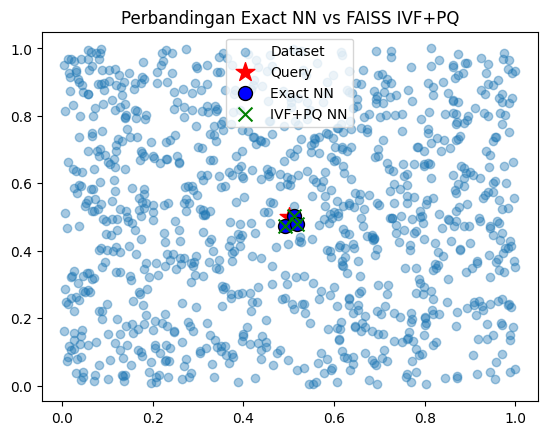

In [ ]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 2D sederhana
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 titik 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query di tengah

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 2        # berapa subvector untuk product quantization
quantizer = faiss.IndexFlatL2(2)   # dipakai IVF untuk cluster awal
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ")
plt.show()

Uji Coba

In [ ]:
import numpy as np
import faiss
import time

# =============================
# 🔹 Fungsi bantu untuk hitung Cosine Distance
# =============================
def build_index(metric, dim, nlist=100, m=4):
    if metric == "L2":
        quantizer = faiss.IndexFlatL2(dim)
        index = faiss.IndexIVFPQ(quantizer, dim, nlist, m, 8)
    elif metric == "Cosine":
        quantizer = faiss.IndexFlatIP(dim)
        index = faiss.IndexIVFPQ(quantizer, dim, nlist, m, 8)
    else:
        raise ValueError("Metric harus 'L2' atau 'Cosine'")
    return index

# =============================
# 🔹 Percobaan konfigurasi
# =============================
configs = [
    {"n_data": 1_000, "dim": 2},
    {"n_data": 1_000, "dim": 5},
    {"n_data": 1_000_000, "dim": 2},
    {"n_data": 1_000_000, "dim": 5},
]

metrics = ["L2", "Cosine"]

# =============================
# 🔹 Loop percobaan
# =============================
for config in configs:
    n_data = config["n_data"]
    dim = config["dim"]
    print(f"\n=== Dataset {n_data} data, {dim}D ===")

    # Buat data
    np.random.seed(42)
    X = np.random.random((n_data, dim)).astype('float32')
    query = np.random.random((1, dim)).astype('float32')

    # Jika pakai cosine, normalisasi data & query ke unit vector
    def normalize(x):
        return x / np.linalg.norm(x, axis=1, keepdims=True)

    for metric in metrics:
        print(f"\n>> Metric: {metric}")

        # ==== Exact NN (Flat) ====
        if metric == "L2":
            index_flat = faiss.IndexFlatL2(dim)
        else:
            index_flat = faiss.IndexFlatIP(dim)
            X = normalize(X)
            query = normalize(query)
        index_flat.add(X)

        start = time.time()
        D_flat, I_flat = index_flat.search(query, 3)
        end = time.time()
        time_flat = end - start

        # ==== IVF+PQ ====
        index_ivfpq = build_index(metric, dim, nlist=100, m=1)
        if metric == "Cosine":
            index_ivfpq.train(normalize(X))
            index_ivfpq.add(normalize(X))
        else:
            index_ivfpq.train(X)
            index_ivfpq.add(X)

        start = time.time()
        D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
        end = time.time()
        time_ivfpq = end - start

        # ==== Print hasil ====
        print(f"Exact NN waktu: {time_flat:.6f}s")
        print(f"IVF+PQ waktu : {time_ivfpq:.6f}s")
        print(f"Exact indices: {I_flat}")
        print(f"IVF+PQ indices: {I_ivfpq}")


=== Dataset 1000 data, 2D ===

>> Metric: L2
Exact NN waktu: 0.000069s
IVF+PQ waktu : 0.000068s
Exact indices: [[112 535 777]]
IVF+PQ indices: [[112 535 246]]

>> Metric: Cosine
Exact NN waktu: 0.000033s
IVF+PQ waktu : 0.000095s
Exact indices: [[738 183 561]]
IVF+PQ indices: [[738 183  91]]

=== Dataset 1000 data, 5D ===

>> Metric: L2
Exact NN waktu: 0.002095s
IVF+PQ waktu : 0.000101s
Exact indices: [[988 780  27]]
IVF+PQ indices: [[988  27 943]]

>> Metric: Cosine
Exact NN waktu: 0.000036s
IVF+PQ waktu : 0.000085s
Exact indices: [[988 943 780]]
IVF+PQ indices: [[ 27 215 423]]

=== Dataset 1000000 data, 2D ===

>> Metric: L2
Exact NN waktu: 0.009407s
IVF+PQ waktu : 0.000153s
Exact indices: [[132774 119034 511191]]
IVF+PQ indices: [[18498 20425 54469]]

>> Metric: Cosine
Exact NN waktu: 0.005830s
IVF+PQ waktu : 0.000150s
Exact indices: [[16338 14369  6618]]
IVF+PQ indices: [[ 500 2780 6618]]

=== Dataset 1000000 data, 5D ===

>> Metric: L2
Exact NN waktu: 0.010902s
IVF+PQ waktu : 0.00

# Praktikum 3

### Langkah 1 - Install hnswlib

In [ ]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528143 sha256=b73975870ecc79748d8c3d84426a4457a86a375d519f4b27038f5f47d684a7f6
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


### Langkah 2 - Hasil Perbandingan exact NN dengan HNSW pada 1000 data 2D

In [ ]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ===========================
# 1. Buat data 2D acak
# ===========================
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

# ===========================
# 2. Exact NN (Brute Force)
# ===========================
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

# ===========================
# 3. HNSW
# ===========================
# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Ukuran maksimum elemen yang bisa ditampung
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data
p.add_items(data)

# Set parameter pencarian
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

=== Exact NN ===
Indices: [[993 964 788 528  16]]
Distances: [[0.01145547 0.02310762 0.0234505  0.02675764 0.0279675 ]]
Waktu: 0.051409006118774414 detik

=== HNSW ===
Indices: [[993 964 788 528  16]]
Distances: [[0.00013123 0.00053396 0.00054993 0.00071597 0.00078218]]
Waktu: 0.0002143383026123047 detik


Uji Coba

In [ ]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# fungsi bantu buat normalisasi (khusus buat cosine)
def normalize(x):
    return x / np.linalg.norm(x, axis=1, keepdims=True)

# setting percobaan: jumlah data dan dimensi yang mau diuji
configs = [
    {"n_data": 1000, "dim": 2},
    {"n_data": 1000, "dim": 5},
    {"n_data": 1_000_000, "dim": 2},
    {"n_data": 1_000_000, "dim": 5},
]

# dua jenis metric yang mau dibandingkan
metrics = ["l2", "cosine"]
k = 5  # cari 5 tetangga terdekat

# mulai looping percobaan
for config in configs:
    n_data = config["n_data"]
    dim = config["dim"]
    print(f"\n=== Dataset: {n_data} data, {dim}D ===")

    # generate data acak tapi tetap bisa direproduksi
    np.random.seed(42)
    data = np.random.random((n_data, dim)).astype(np.float32)
    query = np.array([[0.5] * dim], dtype=np.float32)  # titik query tetap

    for metric in metrics:
        print(f"\n>> Metric: {metric.upper()}")

        # kalau metric cosine, data harus dinormalisasi dulu
        data_metric = data.copy()
        query_metric = query.copy()
        if metric == "cosine":
            data_metric = normalize(data_metric)
            query_metric = normalize(query_metric)

        # ===================================================
        # metode exact / brute force (pakai sklearn)
        # ===================================================
        nn = NearestNeighbors(
            n_neighbors=k,
            algorithm='brute',
            metric='cosine' if metric == 'cosine' else 'euclidean'
        )
        nn.fit(data_metric)
        start = time.time()
        distances_exact, indices_exact = nn.kneighbors(query_metric)
        time_exact = time.time() - start

        print("\n=== Exact NN ===")
        print("Indices:", indices_exact)
        print("Distances:", distances_exact)
        print("Waktu:", time_exact, "detik")

        # ===================================================
        # metode approximate pakai HNSW
        # ===================================================
        p = hnswlib.Index(space=metric, dim=dim)
        p.init_index(max_elements=n_data, ef_construction=100, M=16)
        p.add_items(data_metric)
        p.set_ef(50)

        start = time.time()
        labels, distances_hnsw = p.knn_query(query_metric, k=k)
        time_hnsw = time.time() - start

        print("\n=== HNSW ===")
        print("Indices:", labels)
        print("Distances:", distances_hnsw)
        print("Waktu:", time_hnsw, "detik")
        print("-" * 50)


=== Dataset: 1000 data, 2D ===

>> Metric: L2

=== Exact NN ===
Indices: [[137 170 750 316 991]]
Distances: [[0.01144331 0.0278216  0.02824018 0.03417073 0.04514859]]
Waktu: 0.0009889602661132812 detik

=== HNSW ===
Indices: [[137 170 750 316 991]]
Distances: [[0.00013095 0.00077404 0.00079751 0.00116764 0.0020384 ]]
Waktu: 6.67572021484375e-05 detik
--------------------------------------------------

>> Metric: COSINE

=== Exact NN ===
Indices: [[135   2 413 210 700]]
Distances: [[0.0000000e+00 0.0000000e+00 3.5762787e-07 6.5565109e-07 1.4305115e-06]]
Waktu: 0.001718759536743164 detik

=== HNSW ===
Indices: [[  2 135 413 210 700]]
Distances: [[-1.1920929e-07  0.0000000e+00  3.5762787e-07  6.5565109e-07
   1.4305115e-06]]
Waktu: 5.817413330078125e-05 detik
--------------------------------------------------

=== Dataset: 1000 data, 5D ===

>> Metric: L2

=== Exact NN ===
Indices: [[895 451 375 386 411]]
Distances: [[0.20408195 0.21927659 0.23501295 0.23602551 0.25026491]]
Waktu: 0.0006

# Praktikum 4

# Perbedaan ketiga model dari praktikum sebelumnya

In [ ]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# 1. Buat dataset 1 juta data 5D
# ===============================
n_data = 1_000_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 22.517231464385986 detik
Query time: 0.0003483295440673828 detik
Neighbors: [13613, 48169, 623361, 416789, 146613] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.025953292846679688 detik
Query time: 0.007993936538696289 detik
Neighbors: [ 13613  48169 623361 416789 146613] ...

=== HNSW (hnswlib) ===
Build time: 184.43771243095398 detik
Query time: 0.00022530555725097656 detik
Neighbors: [ 13613  48169 623361 416789 146613] ...


Uji Coba

In [ ]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ====================================
# Dataset: 1 juta data berdimensi 5
# ====================================
n_data = 1_000_000
dim = 5
k = 10

# data acak
X = np.random.random((n_data, dim)).astype(np.float32)
query = np.random.random((1, dim)).astype(np.float32)

# fungsi bantu untuk normalisasi (buat cosine)
def normalize(x):
    return x / np.linalg.norm(x, axis=1, keepdims=True)

# daftar metric yang mau dicoba
metrics = ["l2", "cosine"]

for metric in metrics:
    print(f"\n===============================")
    print(f" Percobaan dengan metric: {metric.upper()}")
    print(f"===============================")

    # kalau pakai cosine, data dinormalisasi dulu
    X_metric = X.copy()
    query_metric = query.copy()
    if metric == "cosine":
        X_metric = normalize(X_metric)
        query_metric = normalize(query_metric)

    # -----------------------
    # Annoy
    # -----------------------
    print("\n=== Annoy ===")
    # Gunakan 'angular' untuk cosine
    annoy_metric = 'angular' if metric == 'cosine' else 'euclidean'
    ann_index = AnnoyIndex(dim, annoy_metric)

    start = time.time()
    for i in range(n_data):
        ann_index.add_item(i, X_metric[i])
    ann_index.build(10)  # jumlah pohon
    build_time = time.time() - start

    start = time.time()
    neighbors = ann_index.get_nns_by_vector(query_metric[0], k, include_distances=True)
    query_time = time.time() - start

    print(f"Build time: {build_time:.4f} detik")
    print(f"Query time: {query_time:.4f} detik")
    print("Neighbors:", neighbors[0][:5], "...")

    # -----------------------
    # FAISS
    # -----------------------
    print("\n=== FAISS ===")
    if metric == "l2":
        faiss_index = faiss.IndexFlatL2(dim)
    else:
        faiss_index = faiss.IndexFlatIP(dim)  # inner product = cosine similarity
        X_metric = normalize(X_metric)
        query_metric = normalize(query_metric)

    start = time.time()
    faiss_index.add(X_metric)
    build_time = time.time() - start

    start = time.time()
    distances, indices = faiss_index.search(query_metric, k)
    query_time = time.time() - start

    print(f"Build time: {build_time:.4f} detik")
    print(f"Query time: {query_time:.4f} detik")
    print("Neighbors:", indices[0][:5], "...")

    # -----------------------
    # HNSW
    # -----------------------
    print("\n=== HNSW ===")
    # HNSW: 'l2' untuk euclidean, 'cosine' bisa langsung
    hnsw_index = hnswlib.Index(space=metric, dim=dim)

    start = time.time()
    hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
    hnsw_index.add_items(X_metric)
    build_time = time.time() - start

    hnsw_index.set_ef(50)

    start = time.time()
    labels, distances = hnsw_index.knn_query(query_metric, k=k)
    query_time = time.time() - start

    print(f"Build time: {build_time:.4f} detik")
    print(f"Query time: {query_time:.4f} detik")
    print("Neighbors:", labels[0][:5], "...")


 Percobaan dengan metric: L2

=== Annoy ===
Build time: 21.4949 detik
Query time: 0.0002 detik
Neighbors: [902680, 930565, 964849, 807732, 340569] ...

=== FAISS ===
Build time: 0.0080 detik
Query time: 0.0065 detik
Neighbors: [902680 930565 964849 807732 340569] ...

=== HNSW ===
Build time: 183.1455 detik
Query time: 0.0002 detik
Neighbors: [902680 930565 964849 807732 340569] ...

 Percobaan dengan metric: COSINE

=== Annoy ===
Build time: 30.3512 detik
Query time: 0.0002 detik
Neighbors: [837055, 511377, 709885, 902680, 519953] ...

=== FAISS ===
Build time: 0.0164 detik
Query time: 0.0066 detik
Neighbors: [837055 511377 709885 902680 519953] ...

=== HNSW ===
Build time: 167.9354 detik
Query time: 0.0002 detik
Neighbors: [837055 511377 709885 902680 519953] ...


# Praktikum 5

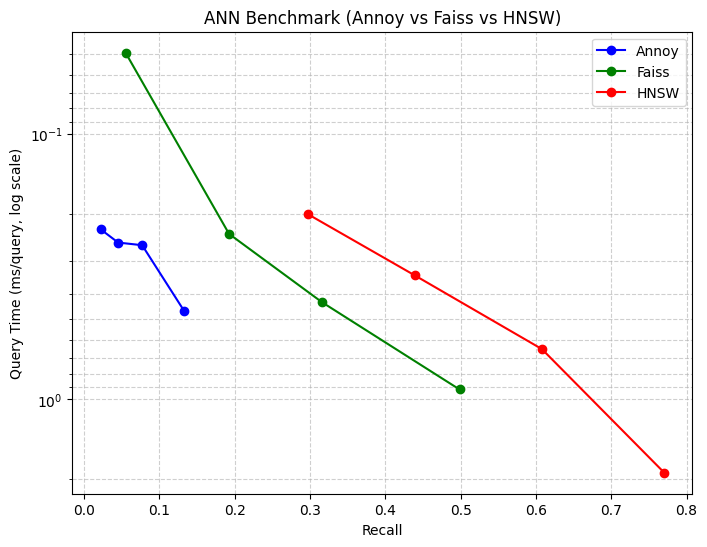

In [ ]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

In [ ]:
# Praktikum 6

In [11]:
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv('/content/drive/MyDrive/RIZKYA S/SEMESTER_5/ML/NEED/songs_with_attributes_and_lyrics.csv')  # ganti path sesuai lokasi file
df = df.sample(300, random_state=42)

features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].values

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

# -------------------------------
# Exact Nearest Neighbor (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=X_scaled.shape[1])
p_hnsw.init_index(max_elements=X_scaled.shape[0], ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)
idx_hnsw, dist_hnsw = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

# -------------------------------
# FAISS IVF
# -------------------------------
start = time.time()
quantizer = faiss.IndexFlatL2(X_scaled.shape[1])
# index_faiss = faiss.IndexIVFFlat(quantizer, X_scaled.shape[1], nlist=100, metric=faiss.METRIC_L2)
nlist = 100
index_faiss = faiss.IndexIVFFlat(quantizer, X_scaled.shape[1], nlist)
index_faiss.train(X_scaled)
index_faiss.add(X_scaled)
index_faiss.nprobe = 10
dist_faiss, idx_faiss = index_faiss.search(X_scaled, k)
time_faiss = time.time() - start
print(f"FAISS IVF done in {time_faiss:.3f} s")

# -------------------------------
# Contoh tampilkan top-5 neighbors dari item pertama
# -------------------------------
print("\nTop-5 neighbors for first song:")
print(f"Exact NN: {idx_exact[0][:5]}")
print(f"Annoy:    {idx_annoy[0][:5]}")
print(f"HNSW:     {idx_hnsw[0][:5]}")
print(f"FAISS:    {idx_faiss[0][:5]}")

Exact NN done in 0.002 s
Annoy done in 0.007 s
HNSW done in 0.019 s
FAISS IVF done in 0.007 s

Top-5 neighbors for first song:
Exact NN: [  0  80 133 117 297]
Annoy:    [0, 80, 133, 117, 297]
HNSW:     [  0  80 133 117 297]
FAISS:    [  0  80 133 117 297]


Berdasarkan percobaan, keempat algoritma Nearest Neighbor menunjukkan kinerja yang berbeda. Untuk dataset kecil ini (300 sampel), Exact NN justru tercepat (0.002 s) karena overhead pembuatan index pada algoritma approximate seperti Annoy (0.007 s), HNSW (0.019 s), dan FAISS IVF (0.007 s) lebih besar dibanding menghitung jarak langsung. Semua algoritma menghasilkan top-5 neighbors yang sama, menunjukkan approximate NN mampu meniru hasil Exact NN dengan baik setelah fitur distandarisasi menggunakan StandardScaler. Kesimpulannya, Exact NN efektif untuk dataset kecil, sedangkan FAISS dan HNSW lebih direkomendasikan untuk dataset besar karena efisiensi pencarian tetangga yang lebih tinggi, dengan Annoy sebagai opsi ringan dan cepat.

# Tugas

HASIL ANALISIS :
Berdasarkan percobaan pada Google Colab dan PyDroid3, keempat algoritma Nearest Neighbor menunjukkan perbedaan kinerja yang jelas. Pada Google Colab, Exact NN selesai dalam 0.977 detik, Annoy 0.439 detik, HNSW 4.492 detik, dan FAISS IVF 0.239 detik, sedangkan di smartphone melalui PyDroid3, waktu eksekusi meningkat signifikan: Exact NN 1.711 detik, Annoy 2.900 detik, dan HNSW 14.277 detik. Perbedaan ini menunjukkan bahwa spesifikasi perangkat sangat memengaruhi performa algoritma, terutama untuk metode approximate yang memiliki overhead pembuatan index lebih tinggi (HNSW). Semua algoritma tetap memberikan hasil neighbor yang konsisten, menunjukkan approximate NN tetap akurat meski runtime lebih lambat di perangkat dengan spesifikasi terbatas. Kesimpulannya, Exact NN cukup efektif untuk dataset kecil, sementara FAISS dan HNSW lebih direkomendasikan untuk dataset besar pada perangkat dengan performa tinggi.

### Pada Google Colab

In [9]:
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors
from annoy import AnnoyIndex
import hnswlib
import faiss
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Contoh dataset kecil untuk testing
# -------------------------------
np.random.seed(42)
n_samples = 10000   # jumlah database vector
d = 128             # dimensi fitur
X = np.random.random((n_samples, d)).astype('float32')

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

# -------------------------------
# Exact NN (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)  # jumlah pohon (trade-off akurasi vs kecepatan)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=d)
p_hnsw.init_index(max_elements=n_samples, ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)
idx_hnsw, _ = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

# -------------------------------
# FAISS IVF
# -------------------------------
start = time.time()
quantizer = faiss.IndexFlatL2(d)  # index dasar untuk quantizer
index_faiss = faiss.IndexIVFFlat(quantizer, d, 100)  # 100 cluster (nlist)
index_faiss.train(X_scaled)
index_faiss.add(X_scaled)
index_faiss.nprobe = 10  # jumlah cluster yang di-scan
_, idx_faiss = index_faiss.search(X_scaled, k)
time_faiss = time.time() - start
print(f"FAISS IVF done in {time_faiss:.3f} s")

# -------------------------------
# Ringkasan Waktu
# -------------------------------
print("\n=== Ringkasan Waktu (detik) ===")
print(f"Exact NN : {time_exact:.3f}")
print(f"Annoy    : {time_annoy:.3f}")
print(f"HNSW     : {time_hnsw:.3f}")
print(f"FAISS    : {time_faiss:.3f}")

Exact NN done in 0.977 s
Annoy done in 0.439 s
HNSW done in 4.492 s
FAISS IVF done in 0.239 s

=== Ringkasan Waktu (detik) ===
Exact NN : 0.977
Annoy    : 0.439
HNSW     : 4.492
FAISS    : 0.239


### Pada PyDroid3

```
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors
from annoy import AnnoyIndex
import hnswlib
from sklearn.preprocessing import StandardScaler
# ======================================
# Contoh dataset kecil untuk pengujian
# ======================================
np.random.seed(42)
n_samples = 10000   # jumlah vektor
d = 128             # dimensi fitur
X = np.random.random((n_samples, d)).astype('float32')
# Standarisasi fitur agar skala seragam
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k = 10  # jumlah nearest neighbors
# ======================================
# Exact Nearest Neighbor (Brute Force)
# ======================================
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN selesai dalam {time_exact:.3f} detik")
# ======================================
# Annoy (Approximate Nearest Neighbor)
# ======================================
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)  # jumlah pohon (semakin banyak = akurasi naik, tapi lebih lambat)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy selesai dalam {time_annoy:.3f} detik")
# ======================================
# HNSW (Hierarchical Navigable Small World Graph)
# ======================================
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=d)
p_hnsw.init_index(max_elements=n_samples, ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)  # semakin tinggi ef, semakin akurat tapi lebih lambat
idx_hnsw, _ = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW selesai dalam {time_hnsw:.3f} detik")
# ======================================
# Ringkasan waktu eksekusi
# ======================================
print("\n=== RINGKASAN WAKTU EKSEKUSI (detik) ===")
print(f"Exact NN : {time_exact:.3f}")
print(f"Annoy    : {time_annoy:.3f}")
print(f"HNSW     : {time_hnsw:.3f}")
```



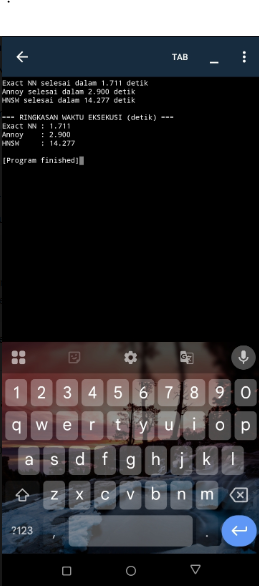

Exact NN selesai dalam 1.711 detik

Annoy selesai dalam 2.900 detik

HNSW selesai dalam 14.277 detik

=== RINGKASAN WAKTU EKSEKUSI (detik) ===

Exact NN : 1.711

Annoy : 2.900 HNSW : 14.277


[Program finished]